In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path =  'C:/Users/sukhr/Desktop/UC BERKELEY Modules/Project 3/Project3/Project 3/Electric_Vehicle_Population_Data.csv'
df  = pd.read_csv(file_path)
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,3C3CFFGE4E,Yakima,Yakima,WA,98902.0,2014,FIAT,500,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,87,0,14.0,1593721,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
1,5YJXCBE40H,Thurston,Olympia,WA,98513.0,2017,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,200,0,2.0,257167501,POINT (-122.817545 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
2,3MW39FS03P,King,Renton,WA,98058.0,2023,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,11.0,224071816,POINT (-122.1298876 47.4451257),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,7PDSGABA8P,Snohomish,Bothell,WA,98012.0,2023,RIVIAN,R1S,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,21.0,260084653,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
4,5YJ3E1EB8L,King,Kent,WA,98031.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,33.0,253771913,POINT (-122.2012521 47.3931814),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


In [3]:
missing_values = df.isnull().sum()
missing_values


VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 360
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [4]:
duplicate_rows = df.duplicated().sum()
duplicate_rows

0

In [5]:
data_types = df.dtypes
data_types



VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [6]:
df['Postal Code'].fillna(-1, inplace=True)
df['Legislative District'].fillna(-1, inplace=True)
df['Postal Code'] = df['Postal Code'].astype(int)
df['Legislative District'] = df['Legislative District'].astype(int)
df.dtypes, df.isnull().sum()

(VIN (1-10)                                            object
 County                                                object
 City                                                  object
 State                                                 object
 Postal Code                                            int32
 Model Year                                             int64
 Make                                                  object
 Model                                                 object
 Electric Vehicle Type                                 object
 Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
 Electric Range                                         int64
 Base MSRP                                              int64
 Legislative District                                   int32
 DOL Vehicle ID                                         int64
 Vehicle Location                                      object
 Electric Utility                                      object
 2020 Ce

In [7]:
sns.set(style = "whitegrid")

<function matplotlib.pyplot.show(close=None, block=None)>

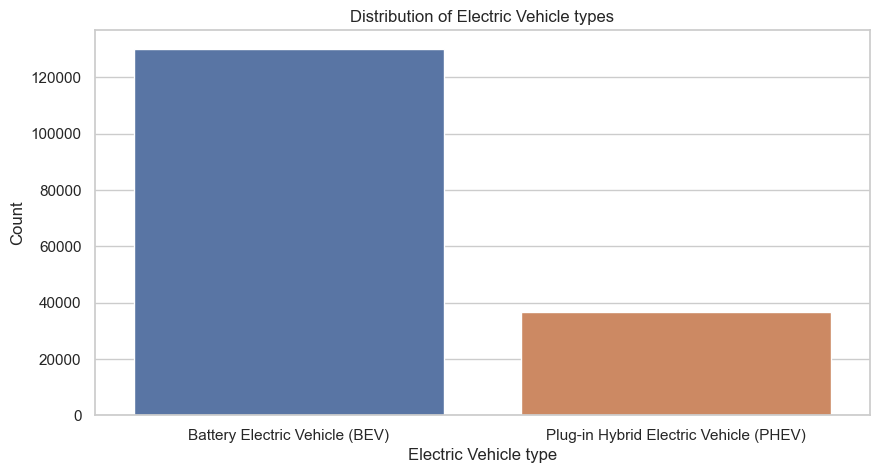

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Electric Vehicle Type', order=df['Electric Vehicle Type'].value_counts().index)
plt.title('Distribution of Electric Vehicle types')
plt.xlabel('Electric Vehicle type')
plt.ylabel('Count')
plt.show

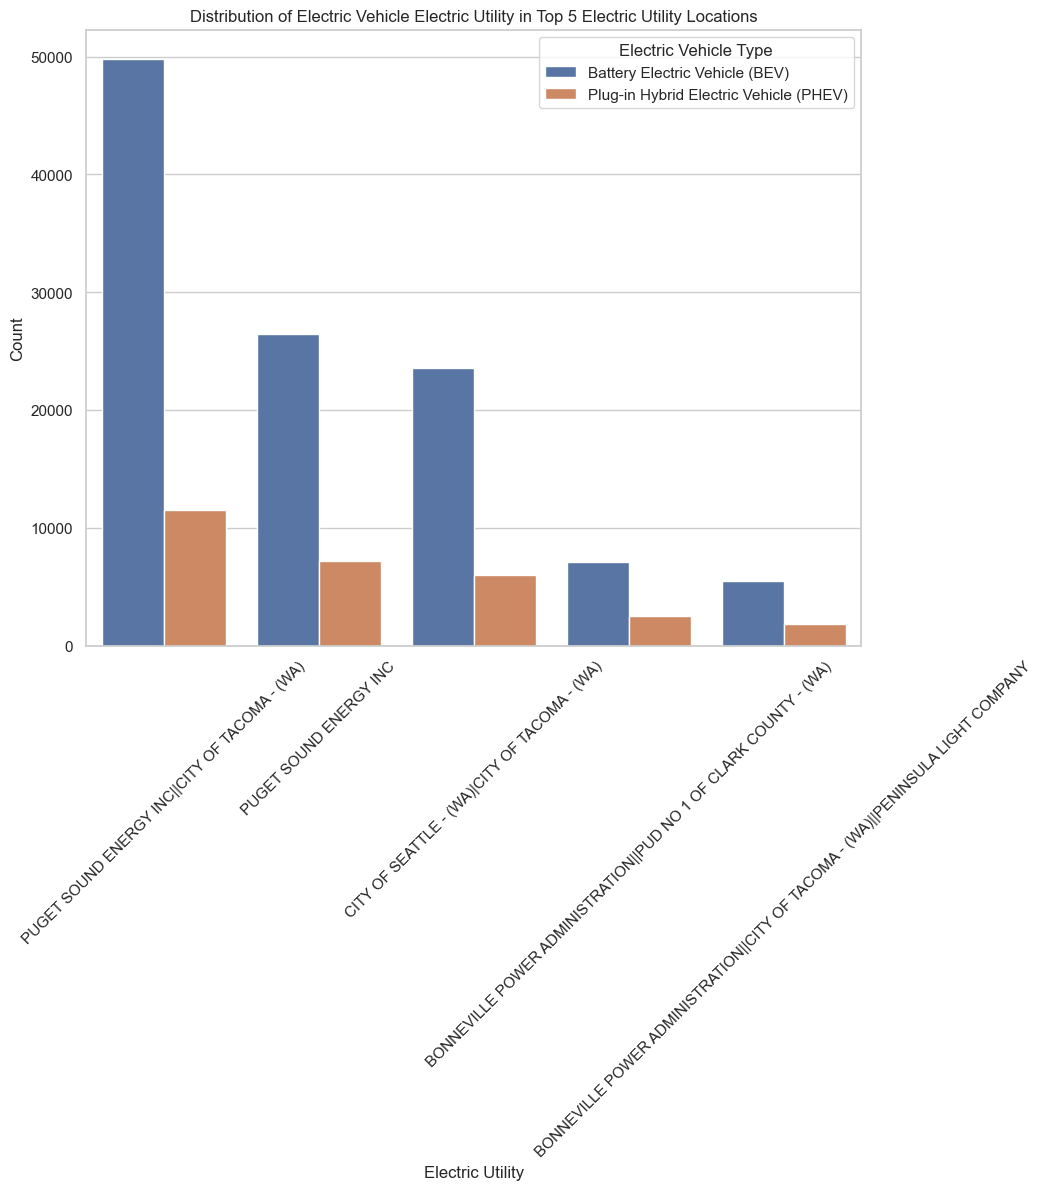

166800


In [23]:

top_counties = df['Electric Utility'].value_counts().index[:5]

plt.figure(figsize=(10, 8))
sns.countplot(data=df[df['Electric Utility'].isin(top_counties)], x='Electric Utility', hue='Electric Vehicle Type', order=top_counties)
plt.title('Distribution of Electric Vehicle Electric Utility in Top 5 Electric Utility Locations')
plt.xlabel('Electric Utility')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Electric Vehicle Type')
plt.show()

suki = df.shape[0]
print(suki)


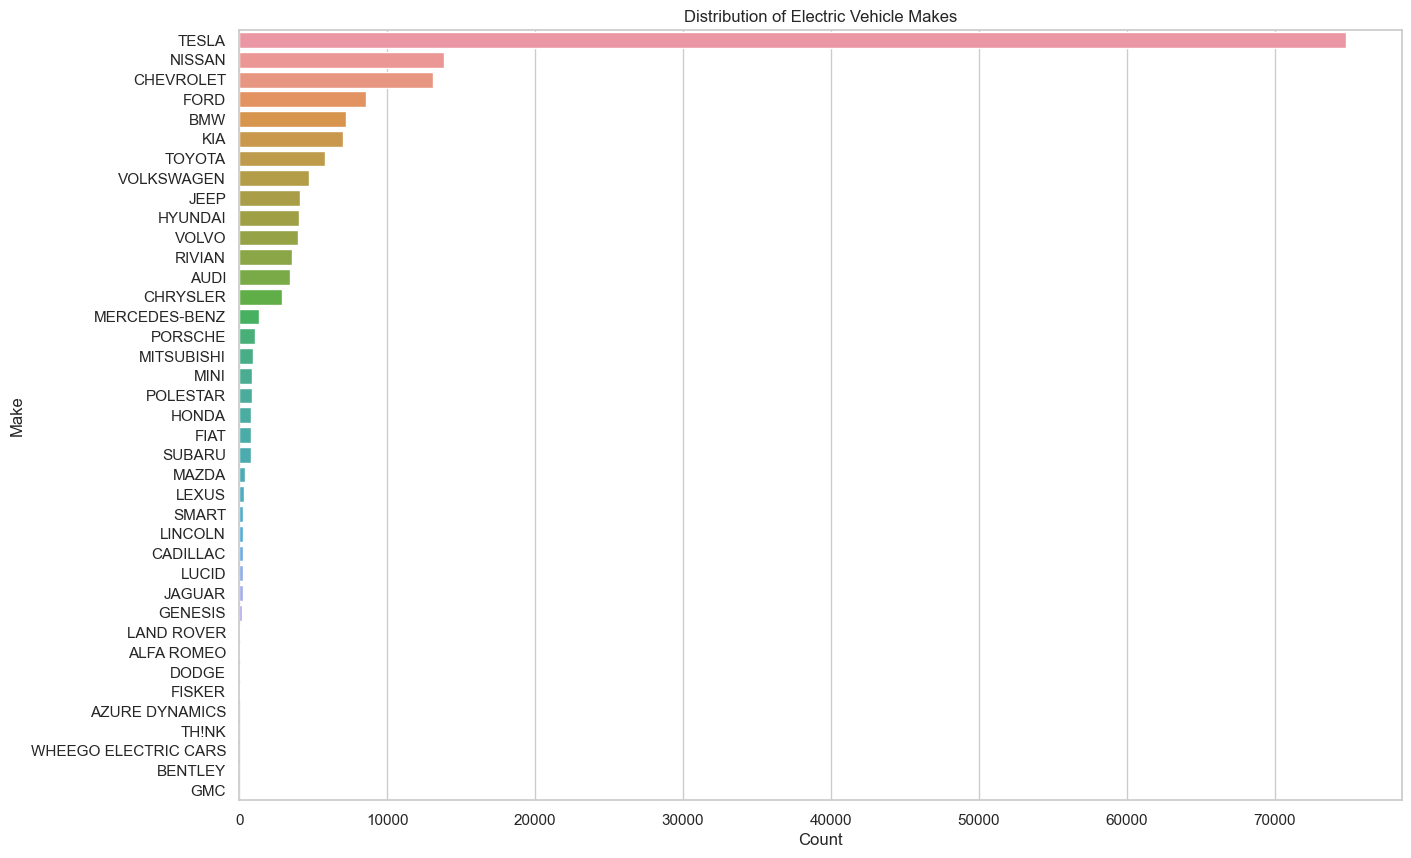

In [10]:
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='Make', order = df['Make'].value_counts().index)
plt.title('Distribution of Electric Vehicle Makes')
plt.xlabel('Count')
plt.ylabel('Make')
plt.show()

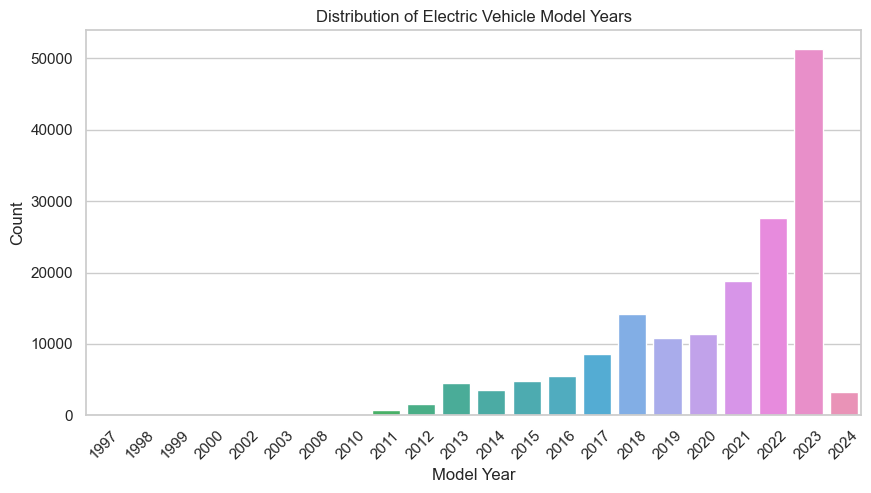

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Model Year', order = sorted(df['Model Year'].unique()))
plt.title('Distribution of Electric Vehicle Model Years')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

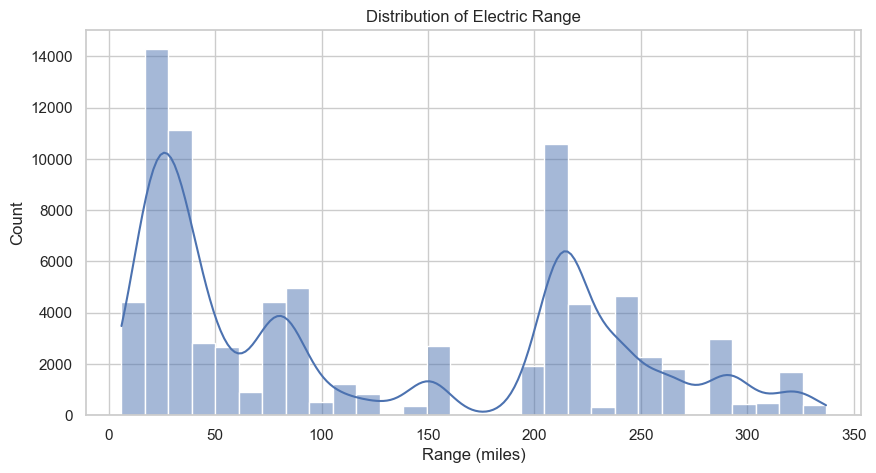

In [12]:
dfnew = df[df['Electric Range'] != 0] 

plt.figure(figsize=(10, 5))
sns.histplot(dfnew['Electric Range'], bins=30, kde=True)
plt.title('Distribution of Electric Range')
plt.xlabel('Range (miles)')
plt.ylabel('Count')
plt.show()



In [13]:
summary_statistics = dfnew['Electric Range'].describe()
print(summary_statistics)
lowest_value = dfnew[dfnew['Electric Range']==dfnew['Electric Range'].min()]
print(lowest_value)
highest_value = dfnew[dfnew['Electric Range']==dfnew['Electric Range'].max()]
print(highest_value)

count    83283.000000
mean       123.190807
std         99.121450
min          6.000000
25%         32.000000
50%         84.000000
75%        215.000000
max        337.000000
Name: Electric Range, dtype: float64
        VIN (1-10)     County        City State  Postal Code  Model Year  \
296     JTDKN3DP5D      Clark   Vancouver    WA        98664        2013   
548     JTDKN3DP7C       King     Seattle    WA        98144        2012   
556     JTDKN3DP7D       King      Auburn    WA        98092        2013   
733     JTDKN3DP2F       King     Seattle    WA        98133        2015   
842     JTDKN3DP1C       King     Seattle    WA        98122        2012   
...            ...        ...         ...   ...          ...         ...   
166163  JTDKN3DP6C      Grant  Moses Lake    WA        98837        2012   
166219  JTDKN3DP0D     Pierce      Tacoma    WA        98409        2013   
166413  JTDKN3DPXE  Snohomish  Marysville    WA        98270        2014   
166420  JTDKN3DP5C       Ki

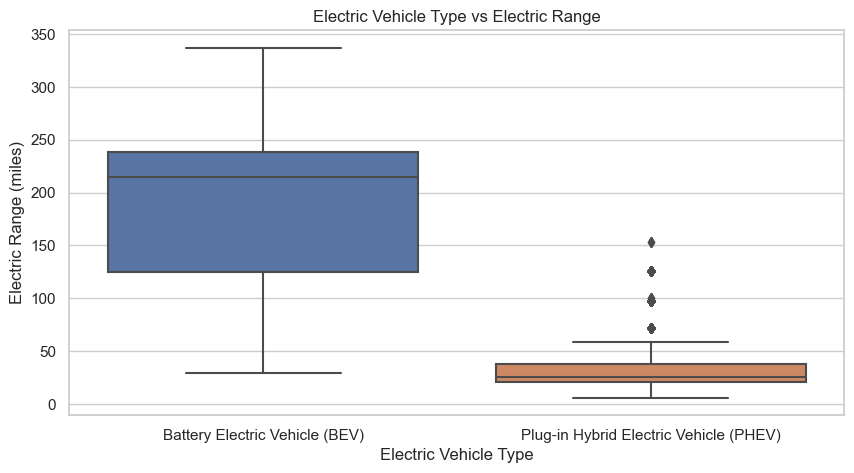

195.38254660509662
30.692360369244255


In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=dfnew, x='Electric Vehicle Type', y='Electric Range', order = df['Electric Vehicle Type'].value_counts().index)
plt.title('Electric Vehicle Type vs Electric Range')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Electric Range (miles)')
plt.show()

dfavg = dfnew[dfnew['Electric Vehicle Type'] ==  'Battery Electric Vehicle (BEV)' ]
average_value=dfavg['Electric Range'].mean()
print(average_value)

dfavg1= dfnew[dfnew['Electric Vehicle Type'] ==  'Plug-in Hybrid Electric Vehicle (PHEV)']
average_value=dfavg1['Electric Range'].mean()
print(average_value)



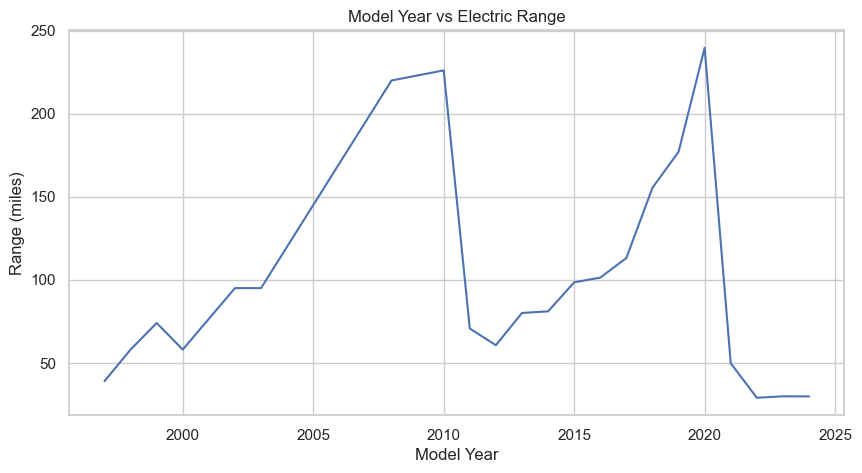

In [15]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=dfnew, x='Model Year', y='Electric Range', errorbar=None)
plt.title('Model Year vs Electric Range')
plt.xlabel('Model Year')
plt.ylabel('Range (miles)')
plt.show()


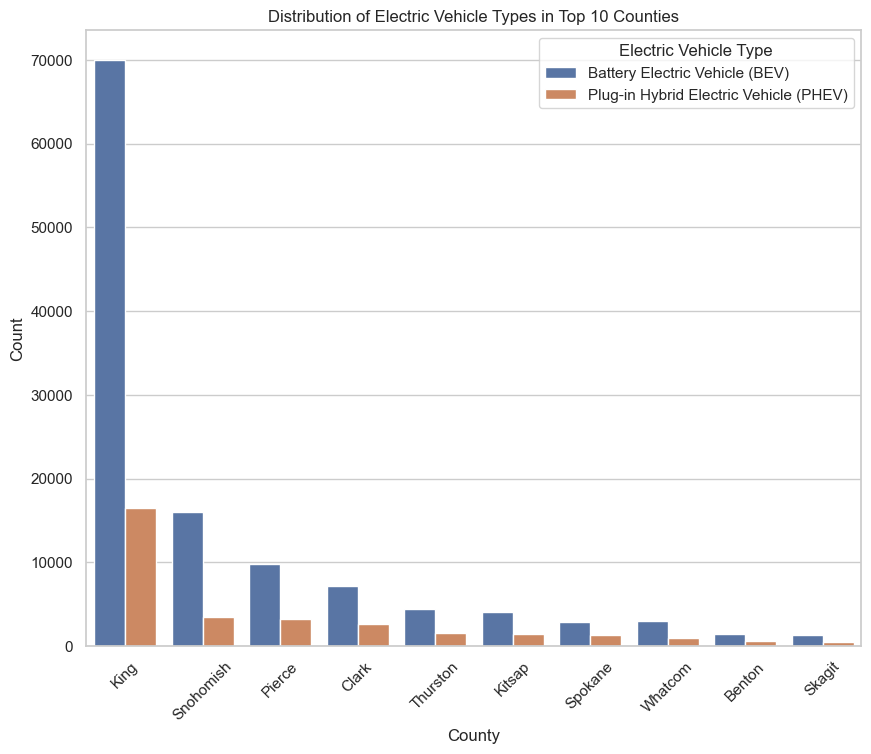

In [16]:
top_counties = df['County'].value_counts().index[:10]

plt.figure(figsize=(10, 8))
sns.countplot(data=df[df['County'].isin(top_counties)], x='County', hue='Electric Vehicle Type', order=top_counties)
plt.title('Distribution of Electric Vehicle Types in Top 10 Counties')
plt.xlabel('County')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Electric Vehicle Type')
plt.show()



C:\Users\sukhr\anaconda3\envs\dev\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sukhr\AppData\Local\Temp\ipykernel_24364\3593458593.py:10: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


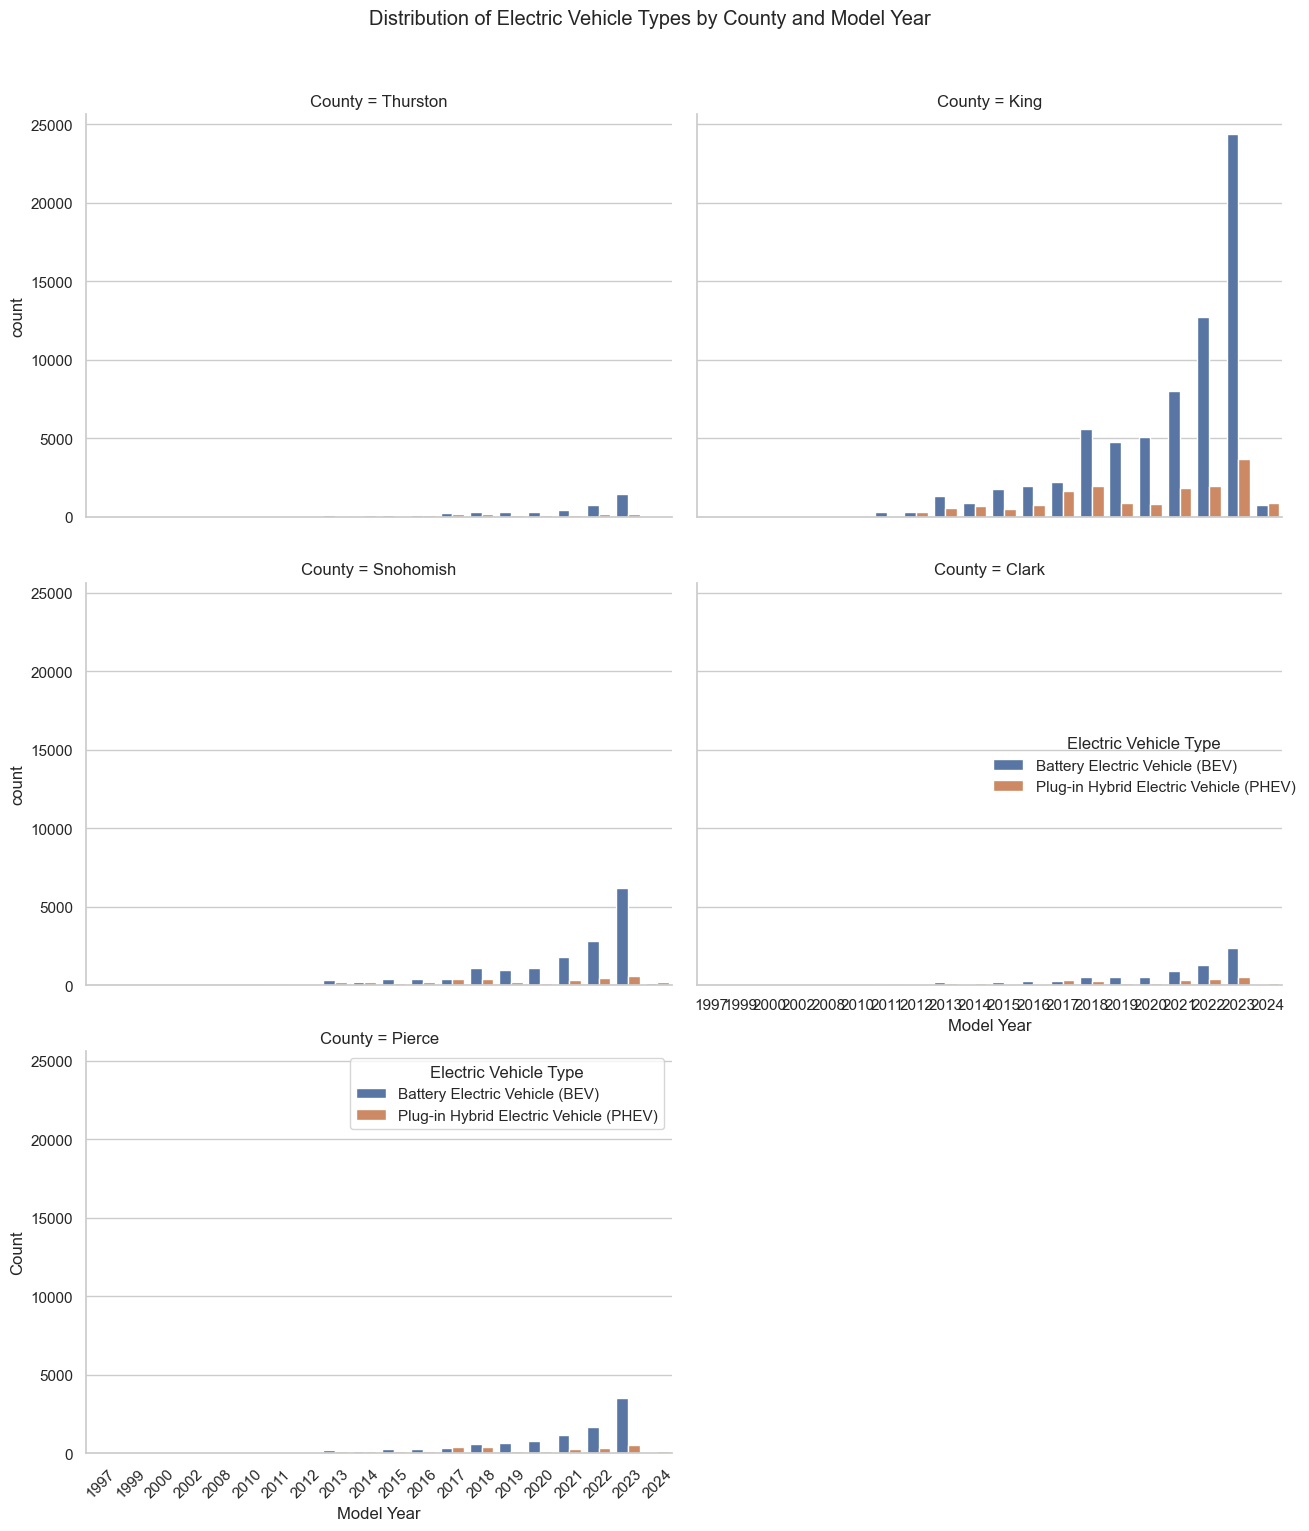

In [17]:
top_5_counties = df['County'].value_counts().index[:5]

sns.catplot(data=df[df['County'].isin(top_5_counties)], x='Model Year', hue='Electric Vehicle Type', kind='count', 
            col='County', col_wrap=2)
plt.suptitle('Distribution of Electric Vehicle Types by County and Model Year', y=1.02)
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Electric Vehicle Type')
plt.tight_layout()
plt.show()